<a href="https://colab.research.google.com/github/Nisrinelyn/Data-Sci/blob/main/finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


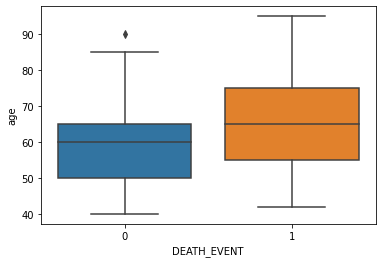

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


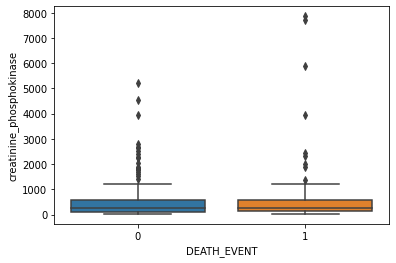

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


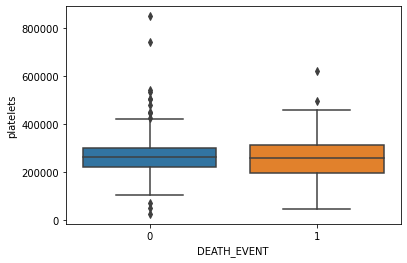

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


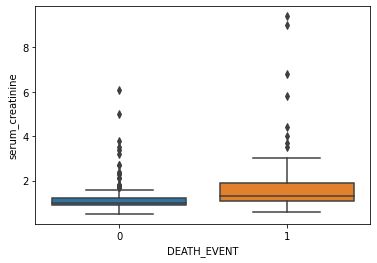

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


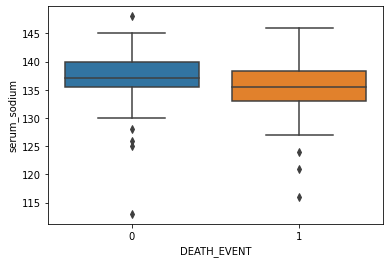

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


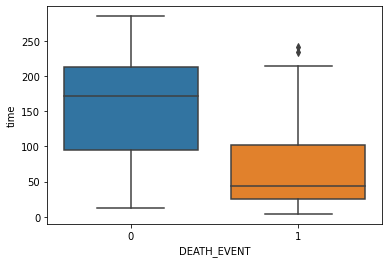

In [ ]:
def plot_box(data, cols, col_x = 'DEATH_EVENT'):
  for col in cols:
    sns.boxplot(col_x, col, data=data)
    plt.xlabel(col_x)
    plt.ylabel(col)
    plt.show()
num_cols = [ 'age', 'creatinine_phosphokinase',
        'platelets','serum_creatinine',
        'serum_sodium','time']
plot_box(data, num_cols)

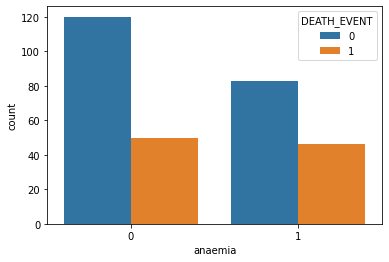

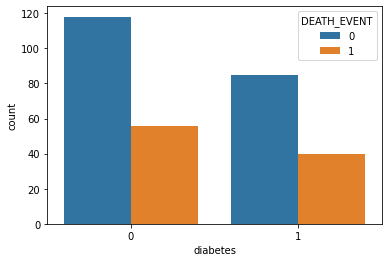

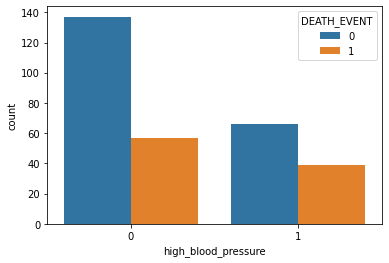

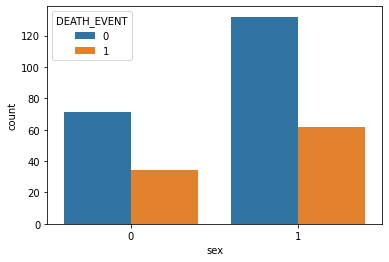

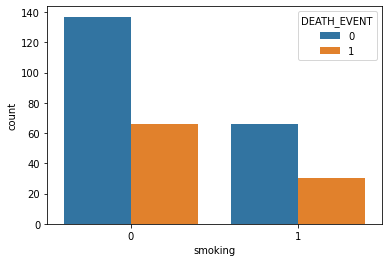

In [ ]:
def count_plot(cols):
  for col in cols:
    sns.countplot(data=data,x = col,hue='DEATH_EVENT')
    plt.show()
num_cols = [ 'anaemia','diabetes', 'high_blood_pressure', 'sex', 'smoking']
count_plot(num_cols)

In [ ]:
feature =['age','anaemia','diabetes', 'high_blood_pressure', 'sex', 'smoking','serum_creatinine','serum_sodium']
X=data[feature]
y=data['DEATH_EVENT']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(1, 4),
 'criterion':['entropy','gini']}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train, y_train)
tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred  = tree.predict(X_test)
print("confusion matrix = \n",confusion_matrix(y_test, y_pred))
X_train_prediction = tree.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,y_train)
print('Accuracy on training data : ', round(training_data_accuray*100,2),"%")
X_test_prediction = tree.predict(X_test)
testing_data_accuray = accuracy_score(X_test_prediction,y_test)
print('Accuracy on testing data : ', round(testing_data_accuray*100,2),"%")

confusion matrix = 
 [[34  6]
 [12  8]]
Accuracy on training data :  81.59 %
Accuracy on testing data :  70.0 %


In [ ]:
from sklearn.tree import export_graphviz
tree_dot = export_graphviz(
tree,
out_file=None,
feature_names= feature,
class_names='DEATH_EVENT',
rounded=True,
filled=True
)
print(tree_dot)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="serum_creatinine <= 1.815\ngini = 0.434\nsamples = 239\nvalue = [163, 76]\nclass = D", fillcolor="#f1bc95"] ;
1 [label="age <= 79.0\ngini = 0.37\nsamples = 204\nvalue = [154, 50]\nclass = D", fillcolor="#edaa79"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="serum_sodium <= 129.5\ngini = 0.341\nsamples = 193\nvalue = [151, 42]\nclass = D", fillcolor="#eca470"] ;
1 -> 2 ;
3 [label="gini = 0.408\nsamples = 7\nvalue = [2, 5]\nclass = E", fillcolor="#88c4ef"] ;
2 -> 3 ;
4 [label="gini = 0.319\nsamples = 186\nvalue = [149, 37]\nclass = D", fillcolor="#eba06a"] ;
2 -> 4 ;
5 [label="serum_creatinine <= 0.95\ngini = 0.397\nsamples = 11\nvalue = [3, 8]\nclass = E", fillcolor="#83c2ef"] ;
1 -> 5 ;
6 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = D", fillcolor="#e58139"] ;
5 -> 6 ;
7 [label="gini = 0.198\nsamples = 9\nvalue =

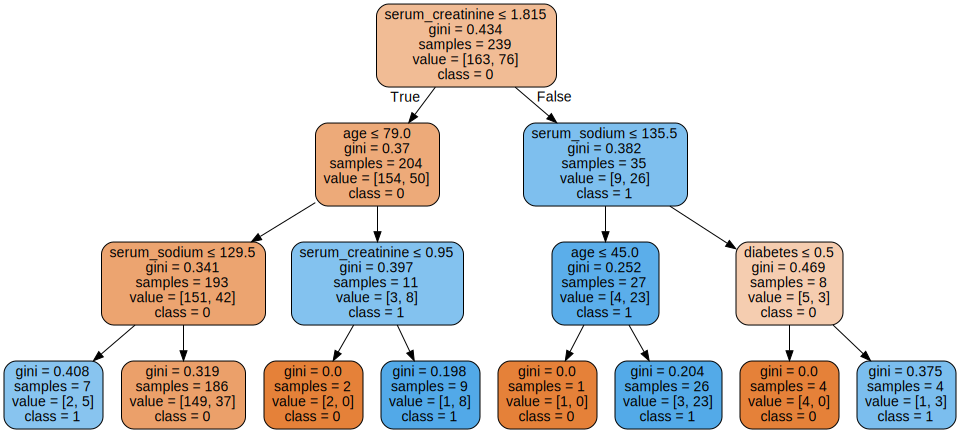

In [ ]:
from graphviz import Source
from IPython.display import SVG
from IPython.display import display
graph = Source(export_graphviz(tree, out_file=None,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature,class_names=['0','1']))
display(SVG(graph.pipe(format='svg')))

In [ ]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel="linear")
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred  = clf.predict(X_test)
print("confusion matrix = \n",confusion_matrix(y_test, y_pred))
X_train_prediction = clf.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,y_train)
print('Accuracy on training data : ', round(training_data_accuray*100,2),"%")
X_test_prediction = clf.predict(X_test)
testing_data_accuray = accuracy_score(X_test_prediction,y_test)
print('Accuracy on testing data : ', round(testing_data_accuray*100,2),"%")

confusion matrix = 
 [[35  8]
 [ 9  8]]
Accuracy on training data :  74.9 %
Accuracy on testing data :  71.67 %
